# Previsão das melhores notas de matemática do ENEM 2016

## Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Leitura dos dados e visualização do conteúdo

In [2]:
df_train = pd.read_csv('train.csv', sep=',', encoding='UTF8')
df_test = pd.read_csv('test.csv', sep=',', encoding='UTF8')

In [3]:
#verificando se o datset test faz parte do datset train
set(df_test.columns).issubset(set(df_train.columns))

True

In [4]:
#numero de linha e colunas do dataframe
df_train.shape, df_test.shape

((13730, 167), (4576, 47))

In [5]:
#visualizaçando colunas
list(df_test.columns)

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

## Análise Exploratória

Nem todas as variáveis são importantes para previsão das melhores notas de matemática

In [6]:
#verificando quais features tem maior correlação com a target NU_NOTA_MT
col = ['NU_NOTA_MT', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']
df_train[col].corr()

,NU_NOTA_MT,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_NOTA_MT,1.000000,0.107493,-0.061485,-0.157364,-0.034965,-0.087869,0.029039,0.069304,-0.086353,-0.022287,...,0.529594,0.494695,-0.201726,-0.059376,0.299402,0.335638,0.350307,0.342282,0.343337,0.379376
CO_UF_RESIDENCIA,0.107493,1.000000,-0.002017,-0.234786,0.009433,0.025822,-0.032538,0.041406,0.018145,-0.034944,...,0.122825,0.128479,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629
NU_IDADE,-0.061485,-0.002017,1.000000,0.009675,-0.017713,-0.253403,0.681435,-0.296328,0.516253,-0.295091,...,-0.001611,-0.024979,0.082065,0.055675,-0.102243,-0.114181,-0.104293,-0.110452,-0.086709,-0.116125
TP_COR_RACA,-0.157364,-0.234786,0.009675,1.000000,0.015761,0.000738,0.003942,-0.041713,0.040504,0.009676,...,-0.161831,-0.168624,0.116860,0.020586,-0.097606,-0.090291,-0.096344,-0.102936,-0.091136,-0.107840
TP_NACIONALIDADE,-0.034965,0.009433,-0.017713,0.015761,1.000000,-0.000054,-0.026154,0.024070,0.020522,-0.015179,...,-0.049801,-0.049631,0.015266,0.005211,-0.031126,-0.030800,-0.027184,-0.031422,-0.025561,-0.032759
TP_ST_CONCLUSAO,-0.087869,0.025822,-0.253403,0.000738,-0.000054,1.000000,-0.592834,0.156222,NaN,0.533983,...,-0.139415,-0.117616,-0.025174,0.037078,-0.105647,-0.110186,-0.114245,-0.117711,-0.089861,-0.120580
TP_ANO_CONCLUIU,0.029039,-0.032538,0.681435,0.003942,-0.026154,-0.592834,1.000000,-0.422308,NaN,-0.257710,...,0.088827,0.077917,0.061881,0.005578,0.027881,0.006023,0.011259,0.022018,0.003954,0.015097
TP_ESCOLA,0.069304,0.041406,-0.296328,-0.041713,0.024070,0.156222,-0.422308,1.000000,-0.047195,-0.244562,...,0.052710,0.037254,-0.070008,-0.026380,0.059108,0.084441,0.079996,0.068909,0.071172,0.082520
TP_ENSINO,-0.086353,0.018145,0.516253,0.040504,0.020522,NaN,NaN,-0.047195,1.000000,NaN,...,-0.085401,-0.092792,0.018257,0.040453,-0.088155,-0.115773,-0.107252,-0.114830,-0.103573,-0.119816
IN_TREINEIRO,-0.022287,-0.034944,-0.295091,0.009676,-0.015179,0.533983,-0.257710,-0.244562,NaN,1.000000,...,-0.053460,-0.028261,-0.036395,0.006688,-0.008709,-0.023308,-0.030147,-0.025958,-0.025811,-0.026328


In [7]:
#features com melhores correlações
features = [
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']
features_corr = [
 'NU_NOTA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [8]:
#verificando se existem valores faltantes nos dados
df_train[features].isna().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
dtype: int64

In [9]:
#removendo as linhas em que tem informações faltantes
#como os valores faltantes se repetem para algumas variáveis (1134 e 1199), suponho que estejam na mesma linha, sendo assim:  
df_test.dropna(axis=0, subset=['NU_NOTA_CN','NU_NOTA_LC'],inplace=True)
df_train.dropna(axis=0, subset=['NU_NOTA_CN','NU_NOTA_LC'],inplace=True)

In [10]:
#verificando se foram removidas
print(df_train[features_corr].isna().sum())
print(df_test[features].isna().sum())

NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64


In [11]:
#numero de linha e colunas do dataframe
df_train.shape, df_test.shape

((10097, 167), (3360, 47))

In [12]:
#verificando se há duplicatas
df_test.duplicated().sum()

0

In [13]:
#as notas zeradas também não entraram na análise
df_train = df_train.loc[
    (df_train['NU_NOTA_CN'] != 0) &
    (df_train['NU_NOTA_CH'] != 0) &
    (df_train['NU_NOTA_LC'] != 0) &
    (df_train['NU_NOTA_REDACAO'] != 0)    
]
df_test = df_test.loc[
    (df_test['NU_NOTA_CN'] != 0) &
    (df_test['NU_NOTA_CH'] != 0) &
    (df_test['NU_NOTA_LC'] != 0) &
    (df_test['NU_NOTA_REDACAO'] != 0)    
]

In [14]:
df_train.shape, df_test.shape

((9852, 167), (3286, 47))

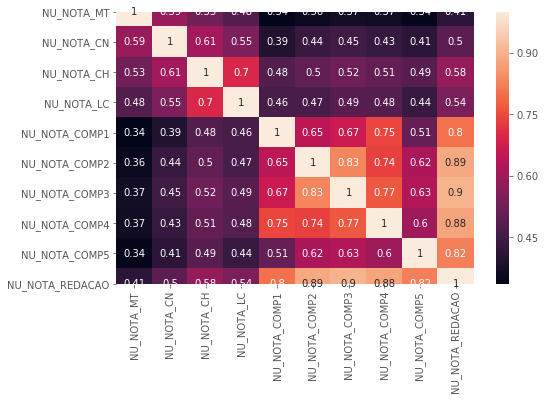

In [15]:
#verificando se existem colunas fortemente correlacionadas
corrmat = df_train[features_corr].corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat,  annot=True, annot_kws={"size": 10})

In [16]:
#sumário estatistico descritivo para notas de Ciências Naturais
df_train['NU_NOTA_CN'].describe()

count    9852.000000
mean      475.091372
std        70.385619
min       344.800000
25%       420.975000
50%       461.350000
75%       516.400000
max       806.400000
Name: NU_NOTA_CN, dtype: float64

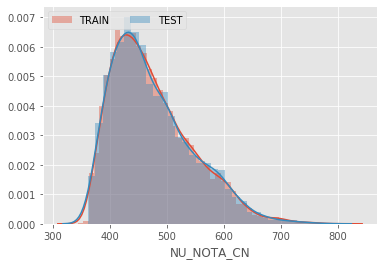

In [17]:
#histograma - Notas Ciências Naturais
sns.distplot(df_train['NU_NOTA_CN'])
sns.distplot(df_test['NU_NOTA_CN'])
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left')

In [18]:
#Sumário estatistico descritivo para notas de Ciências Humanas
df_train['NU_NOTA_CH'].describe()

count    9852.000000
mean      531.906608
std        72.715088
min       324.400000
25%       482.775000
50%       533.800000
75%       583.200000
max       807.000000
Name: NU_NOTA_CH, dtype: float64

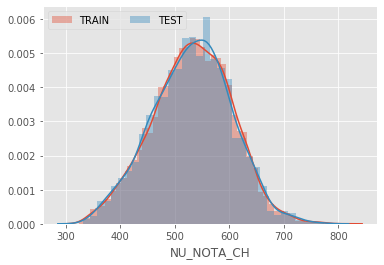

In [19]:
#Histograma - Notas Ciências Humanas
sns.distplot(df_train['NU_NOTA_CH'])
sns.distplot(df_test['NU_NOTA_CH'])
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left')

In [20]:
#Sumário estatistico descritivo para notas de Linguagens e Códigos
df_train['NU_NOTA_LC'].describe()

count    9852.000000
mean      518.289048
std        66.937099
min       306.000000
25%       471.100000
50%       522.500000
75%       565.800000
max       763.600000
Name: NU_NOTA_LC, dtype: float64

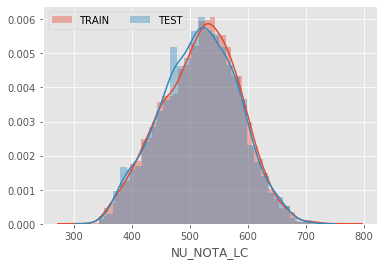

In [21]:
#Histograma - Notas Linguagens e Códigos
sns.distplot(df_train['NU_NOTA_LC'])
sns.distplot(df_test['NU_NOTA_LC'])
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left')

In [22]:
#Sumário estatistico descritivo para notas de Redação
df_train['NU_NOTA_REDACAO'].describe()

count    9852.000000
mean      542.264109
std       131.854827
min        40.000000
25%       460.000000
50%       540.000000
75%       600.000000
max      1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

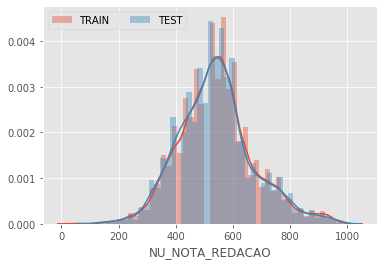

In [23]:
#Histograma - Notas Redação
sns.distplot(df_train['NU_NOTA_REDACAO'])
sns.distplot(df_test['NU_NOTA_REDACAO'])
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left')

## Modelo de Regressão

In [24]:
#atribuindo x, y ao target
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
#regressão
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [26]:
#treinando o modelo através do fit
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [27]:
#realizando a predição das notas da base test
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 53.2968663
MSE: 4675.91922552
RMSE: 68.38069337


In [29]:
y_pred_test

array([417.7888, 441.9942, 590.6848, ..., 470.66  , 697.4666, 445.9663])

## Salvando os resultados

In [30]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_answer['NU_NOTA_MT'] = np.around(y_pred_test)

In [35]:
df_answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,418.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,591.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,505.0
5,e656d6bad65c93fb2880f1eba5037008c8e75774,467.0
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,512.0
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,446.0
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,471.0
4573,655fa6306720ff16e825903b5422a46608a77545,697.0


In [34]:
df_answer.to_csv('answer.csv', index=False, header=True)